#          **Linear Regression Model Project in Python for Beginners Part 1**



## **Approach**

* Install Packages
* Import Libraries
* Data Reading from Different Sources
* Exploratory Data Analysis
* Correlation
* Relationship between Cost and Score
* Train - Test Split
* Linear Regression
* Model Summary
* Prediction on Test Data
* Diagnostics and Remedies

## **Project Overview**

The English Premier League is one of the world's most-watched soccer leagues, with an estimated audience of 12 million people per game.
With the substantial financial benefits, all significant teams of EPL are interested in Analytics and AI. Regarding sports analytics, machine learning and artificial intelligence (AI) have become extremely popular. The sports entertainment sector and the relevant stakeholders extensively use sophisticated algorithms to improve earnings and reduce business risk associated with selecting or betting on the wrong players.

Regression is one of the foundational techniques in Machine Learning. As one of the most well-understood algorithms, linear regression plays a vital role in solving real-life problems.
In this project, we wish to use Linear Regression to predict the scores of EPL soccer players.
With the business implications cleared. Let's get into the project's technical details.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Install required packages with versions

!pip install numpy==1.21.2 --quiet
!pip install seaborn==0.11.1 --quiet
!pip install matplotlib==3.1.1 --quiet
!pip install statsmodels==0.12.2 --quiet
!pip install pandas==1.2.4 --quiet
!pip install scipy==1.6.3 --quiet
!pip install scikit_learn==1.0.2 --quiet



In [ ]:
#import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy
from matplotlib.pyplot import figure


In [ ]:
# Load the data as a data frame by using URL

soccer_data_url="EPL_Soccer_MLR_LR.csv"
df = pd.read_csv(soccer_data_url)

In [ ]:
#view top 3 entries from the soccer data

df.head(3)

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88


In [ ]:
df.columns

Index(['PlayerName', 'Club', 'DistanceCovered(InKms)', 'Goals',
       'MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost', 'Height', 'Weight', 'Score'],
      dtype='object')

## **Data Dictionary**

* PlayerName : Player Name

* Club : Club of the player
  1. MUN:Manchester United F.C.
  2. CHE: Chelsea F.C.
  3. LIV: Liverpool F.C.

* DistanceCovered(InKms): Average Kms distance covered by the player in each game

* Goals: Average Goals per match

* MinutestoGoalRatio: Minutes

* ShotsPerGame: Average shots taken per game

* AgentCharges: Agent Fees in h

* BMI: Body-Mass index

* Cost: Cost of each player in hundread thousand dollars

* PreviousClubCost: Previous club cost in hundread thousand dollars

* Height: Height of player in cm

* Weight: Weight of player in kg

* Score: Average score per match


## **Exploratory Data Analysis**
Exploratory Data Analysis, commonly known as EDA, is a technique to analyze the data with visuals. It involves using statistics and visual techniques to identify particular trends in data.

It is used to understand data patterns, spot anomalies, check assumptions, etc. The main purpose of EDA is to help look into the data before making any hypothesis about it.


### **Dataframe Information**


The [dataframe.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) method prints information about the DataFrame, including the index dtype and columns, non-null values, and memory usage.

It can be used to get basic info, look for missing values, and get a sense of each variable's format.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


There are total 202 rows and 13 columns in EPL Soccer Dataset.

Observe that there are no null values in the dataset.

Out of 13 columns 10 are float type and 1 is integer type
The remaining 2 have object dtype.

Learn about Essential basic functionality for pandas dataframe [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes).



## **Dataframe Description**
To generate descriptive statistics [pandas.dataframe.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function is used.

Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.


It is used to get a basic description of the data, looking at the spread of the different variables,
along with abrupt changes between the minimum, 25th, 50th, 75th, and max for the different variables.

The quartiles provide an excellent insight into the range of a set of data. You may easily establish where your data sits in the range and which quartile you fall into by knowing the percentile points 25th, 50th, and 75th, as well as your own data point.

* The 25th percentile is also referred to as the first, or lower, quartile. The 25th percentile is the figure at which 25% of the data falls below it and 75% of the answers fall above it.

* The Median is also known as the 50th percentile. The median divides the set of data in half. Half of the data points are below the median, while the other half are above it.

* The 75th percentile is often referred to as the third, or upper, quartile. The 75th percentile is the value at which 25% of the responses are higher and 75% of the answers are lower.


<br>


### **Descriptive statistic for quantitative variables**

DataFrame.count: Count number of non-NA/null observations

DataFrame.max: Maximum of the values in the object

DataFrame.min: Minimum of the values in the object

DataFrame.mean: Mean of the values

DataFrame.std: Standard deviation of the observations

DataFrame.select_dtypes: Subset of a DataFrame including/excluding columns based on their dtype


In [ ]:
# descriptive statistics

df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


### **Did you know - I**
To get summary of all the columns you can provide include = 'all' in the describe function

code: df.describe(include='all')

For object data (e.g. strings or timestamps), the result’s index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency. Timestamps also include the first and last items.

To find correlation between variables from the soccer data we will use [pandas.dataframe.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method.

It computes pairwise correlation between two columns by excluding NA or NaN values if any. The default method used to calculate correlation coefficient is pearson correlation.

In [ ]:
df.corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


The correlation between DistanceCovered(InKms) and the target variable score $-0.49$ indicates negative correlation.
The variable cost is related to the target variable with correlation coefficient $0.96$ which indicates strong positive relationship.


### **Did you know - II**
Pearson correlation coefficient can only measure linear relationship between data.
The following data shows non linear relationship which can not be found by using pearson correlation coefficient. In such cases Spearman's correlation coefficient is used. It can be used to find nonlinear, monotonic relationships and for ordinal data.





## **Relationship between Cost and Score**

Score and Cost have a 96% correlation, making it a significant variable. Cost can be selected as the predictor variable for simple linear regression since the scatter plot between them will demonstrate a linear relationship.


To see this relationship visually, let's plot the scatter plot for Cost and Score.


Text(0.5, 1.0, 'Scatter plot between Cost and Score')

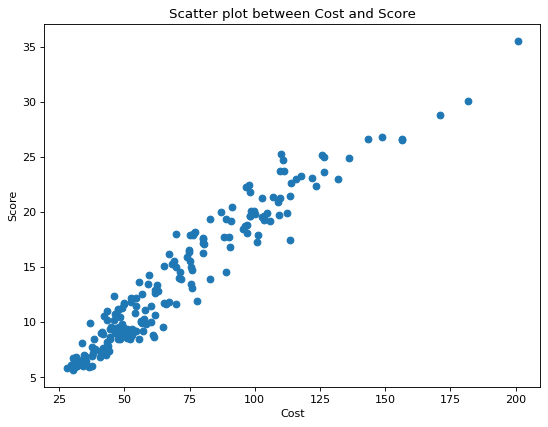

In [ ]:
#Let's plot cost vs. score

figure(figsize=(8, 6), dpi=80)
plt.scatter(df['Cost'], df['Score'])

# label

plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score")

# Strong linear association between cost and score, maybe some concern with model after a cost of 125 or so!



The correlation between Cost and Score is easily visible here.

The Pearson correlation and scatter plot demonstrate that as the cost increases, so does the score. But what can we do with this knowledge?

How can we know how much money should be spent to achieve a specific score?
This is where Linear Regression comes in. It assists us in modeling the linear relationship between two or more variables so that we may foresee the results using the model.

Let's figure out how.




In [ ]:
# Assign x, y then do training testing split

x=df['Cost']
y=df['Score']

# Splitting with 75% training, 25% testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

The data is first assigned to input variable (x) and output variable (y) accordingly, then the train test split function from sklearn is used to perform splitting into a ratio of 75:25 with a random state of 100. The random state is a seed given to randomly generate indices for train and test sets.

Let’s move to our case, we are going to model the relationship between Cost and Scores using Ordinary Least Squares of the statsmodels library.

In [ ]:
#statsmodels approach to regression
# fit the model
lr = sm.OLS(y_train, x_train).fit()

# Printing the parameters
lr.params
lr.summary()

#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           6.91e-88
Time:                        08:08:51   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9472      0.325      2.916      0.0

### **Did you know - IV**

### **$R^2$ can take negative values!**

It compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then $R^2$  is negative which will essentially mean that model is making no sense and is predicting randomly.

const    0.947185
Cost     0.182083
dtype: float64


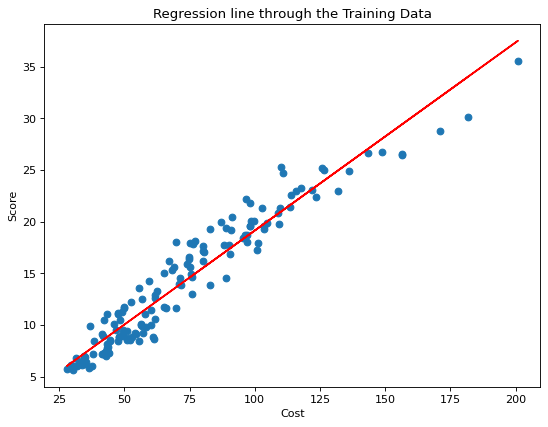

In [ ]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_train, y_train)

plt.plot(x_train, b0+ b1*x_train, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Training Data")

plt.show()

In this plot, we are extracting the values of the intercept $\beta_0$ and coefficient/slope $\beta_1$ and plotting the regression line over the scatter plot of the Cost and Score of training data.

The regression line has a good fitting, it probably deviates a little after a cost of 125 or so, let's see if we can improve it in the later sections when we diagnose and remedy but first let's see how our model performs on the test data.


## **Prediction on Test Data**

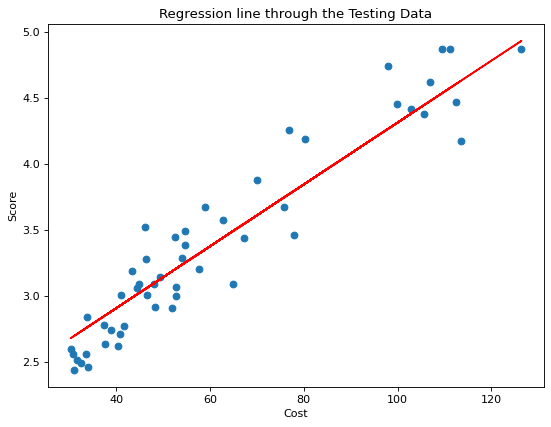

In [ ]:
#Plot the fitted line on test data
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


# scatter plot on test data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Testing Data")

plt.show()


Here we can see that the model has built a good regression fit as it is passing through the middle of all the points to get the minimum error.

Observe that all the data points in the test data lie in the range of the training data. This is called interpolation. What if we analyze a data point with a cost say 560? This is extrapolation and the model probably won't be robust to it.


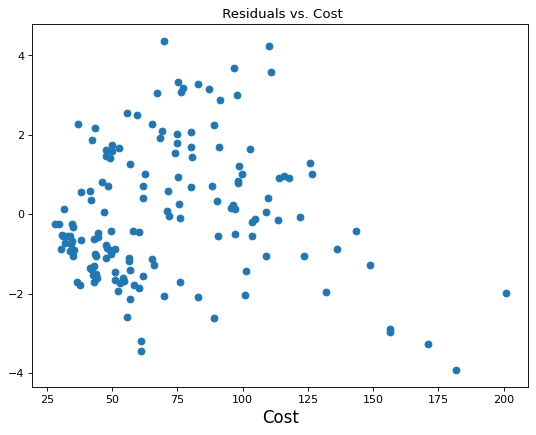

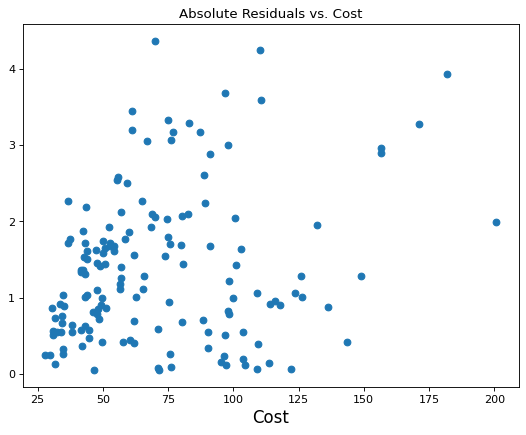

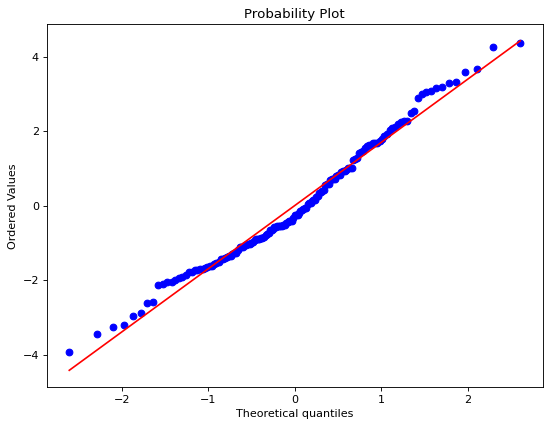

<Figure size 432x288 with 0 Axes>

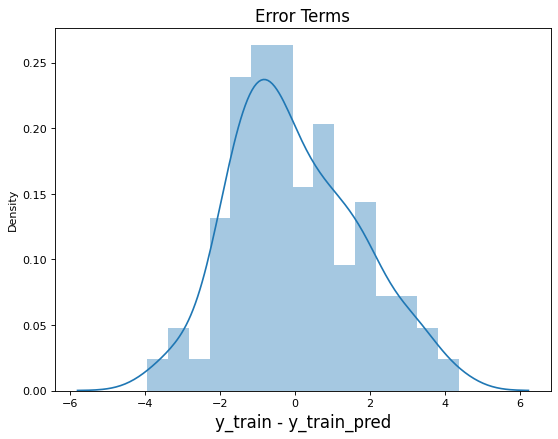

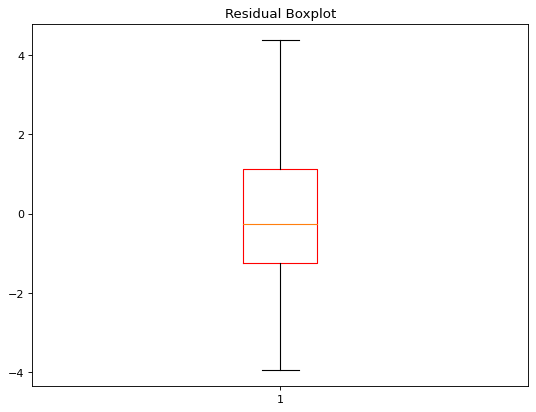

In [ ]:
#DIAGNOSTICS

#CHECKLIST:
# NON-LINEARITY
# NON-CONSTANT VARIANCE
# DEVIATIONS FROM NORMALITY
# ERRORS NOT IID
# OUTLIERS
# MISSING PREDICTORS



#Build predictions on training data
predictions_y = lr.predict(x_train_with_intercept)

#Find residuals
r_i = (y_train - predictions_y)


#Residuals vs. predictor in training data
figure(figsize=(8, 6), dpi=80)
plt.title(' Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, r_i)
plt.show()




#Absolute residuals against predictor
abs_r_i = np.abs(y_train - predictions_y)
figure(figsize=(8, 6), dpi=80)
plt.title('Absolute Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, abs_r_i)
plt.show()

#Normality plot
figure(figsize=(8, 6), dpi=80)
scipy.stats.probplot(r_i,plot=plt)

#Tails might be a little heavy, but overall no clear reason to reject normality expectations
# Evaluate normality through histogram of residuals
# Plotting the histogram using the residual values

fig = plt.figure()
figure(figsize=(8, 6), dpi=80)
sns.distplot(r_i, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

#Boxplot for outliers
# plot
figure(figsize=(8, 6), dpi=80)
plt.boxplot(r_i, boxprops=dict(color='red'))
plt.title('Residual Boxplot');



At the beginning of the section - Diagnostics and Remedies, we saw the steps we can take to understand the patterns in data and if we need to do some transformations to make the assumptions of linear regression hold true. Here are the observations that we made from the above plots:

* The residuals vs cost plot shows a good scatter of residuals and no pattern is observed up until 125 or 150 costs. We can say we have some heteroscedasticity in the higher costs. We'll see how we can tackle it.

* The normality of the errors can be seen in the normal probability plot and the histogram. It is more or less normal or bell shaped.

* The residual boxplot shows no obvious outliers.



In [ ]:
#Demo of how to deal with non-constant variance through transformations

test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Residuals vs. predictor in test set
figure(figsize=(8, 6), dpi=80)
plt.title('Test Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.ylabel('Residuals',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Some evidence of non-constant variance

We can see the scatter of data points increases as we increase the cost. This is evidence of Heteroscedasticity.

We'll try different transformations such as square root, log, and box-cox to see if we can introduce linearity with these transformations.

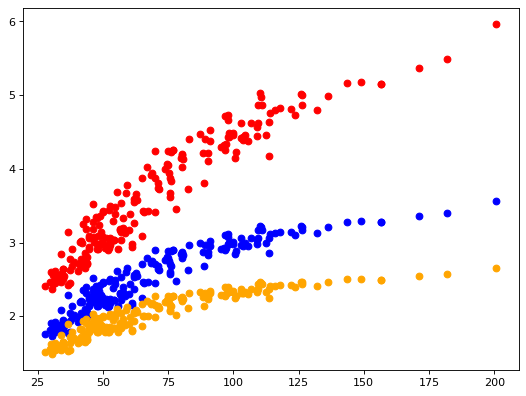

In [ ]:
#

#Try sqrt
sqrt_y=np.sqrt(y)
figure(figsize=(8, 6), dpi=80)
plt.scatter(x, sqrt_y,color='red');

#Try ln
ln_y=np.log(y)
plt.scatter(x, ln_y,color='blue');


#Let's try a BC transformation

#Box Cox procedure on all cost
bc_y=list(stats.boxcox(y))
bc_y=bc_y[0]
plt.scatter(x, bc_y,color='orange');

#Overall, most satisfied with the sqrt transformation

We can observe that the square root transformation denoted by red dots gives the most linear scatter of data points. Let's try to run the linear regression model on the transformed variable and analyze the change in results.

In [ ]:
#Run regression on this set

x_train, x_test, y_train, y_test = train_test_split(x, sqrt_y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)


#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1267.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           9.72e-75
Time:                        09:26:49   Log-Likelihood:                -17.200
No. Observations:                 151   AIC:                             38.40
Df Residuals:                     149   BIC:                             44.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9674      0.052     37.683      0.0

We can see the change in $R^2$ and Adjusted $R^2$ after the transformation. They are almost similar which suggests that $R^2$ is no longer overestimating the variance explained by the predictor variable.

const    1.967367
Cost     0.023433
dtype: float64


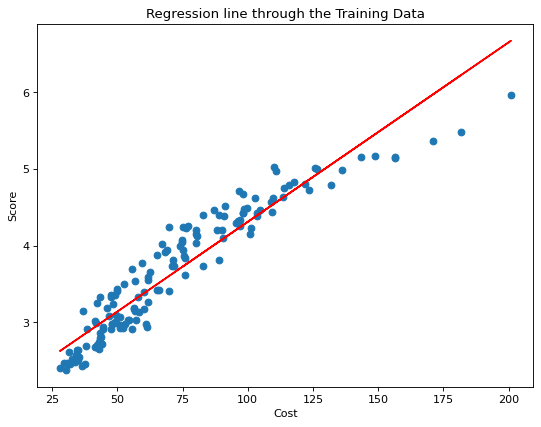

In [ ]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_train, y_train)
plt.plot(x_train, b0+ b1*x_train, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Training Data")
plt.show()


We extracted the linear regression coefficients and plotted the regression line on the Cost vs Score scatter plot.

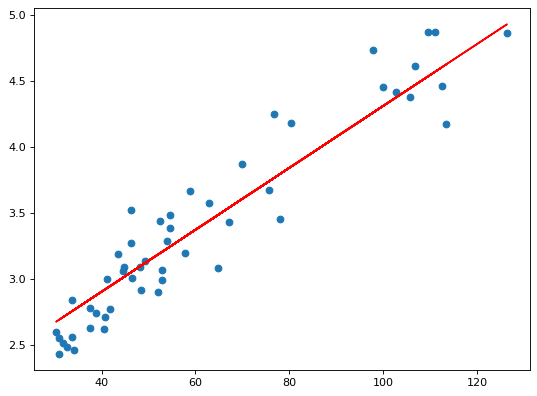

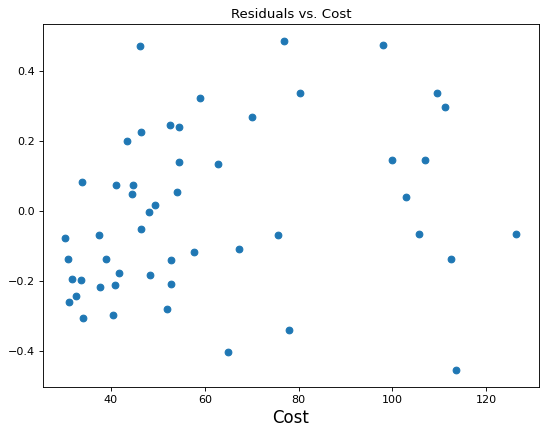

In [ ]:
#Plot the fitted line on test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

figure(figsize=(8, 6), dpi=80)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

#Evaluate variance
#Diagnostics
test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Residuals vs. predictor
figure(figsize=(8, 6), dpi=80)
plt.title('Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Non-constant variance reduced, but we also reduced our coefficient of determination

Here's the same exercise but for the test dataset. Observe that the range of test data is within the train data and the maximum cost is 120, hence the regression line fits in the best way possible.

## **Conclusion**


This project is coming to a close, but let's go through what we learned and what we can do next. With a Simple Linear Regression problem statement, we learned the fundamentals of Linear Regression by predicting the scores of soccer players based on their cost.

We grasped the assumptions for Linear Regression and how to diagnose and correct data errors related to the assumptions.
